# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Create csv path
csv_output_file = "output_data/cities.csv"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [99]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [100]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key
# units = "imperial

# Define an empty list to fetch the weather data for each city
city_data = []



# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
sets = 1

# Loop through all the cities in our list to fetch weather data
for index, city in enumerate(cities):

    if(index % 50 == 0 and index <= 50):
            sets = sets + 1
            record = 0
           


    query_url = base_url + "&q=" + city

    print(f"Processing Record {record} of Set {sets} | {city}")
    record = record + 1

    


    try:
        response = requests.get(query_url).json()
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        
        # new set when record hits 50
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
      
        # print out data
        
        
    except:
        
        print("City not found. Skipping to next available city.")
        pass
        

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 2 | cole harbour
Processing Record 1 of Set 2 | albany
Processing Record 2 of Set 2 | mana
Processing Record 3 of Set 2 | anadyr
Processing Record 4 of Set 2 | arendal
Processing Record 5 of Set 2 | las trojes
Processing Record 6 of Set 2 | yellowknife
Processing Record 7 of Set 2 | smidovich
Processing Record 8 of Set 2 | nuku'alofa
Processing Record 9 of Set 2 | kotlas
Processing Record 10 of Set 2 | morehead city
Processing Record 11 of Set 2 | ribeira grande
Processing Record 12 of Set 2 | nabire
Processing Record 13 of Set 2 | port-aux-francais
Processing Record 14 of Set 2 | tiksi
Processing Record 15 of Set 2 | mermoz boabab
Processing Record 16 of Set 2 | taraz
Processing Record 17 of Set 2 | iqaluit
Processing Record 18 of Set 2 | kailua-kona
Processing Record 19 of Set 2 | malanje
Processing Record 20 of Set 2 | prado
Processing Record 21 of Set 2 | susuman
Processing Record 22 of Set 2 | m

In [101]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count

city_data_df.count()



City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [102]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cole harbour,44.6724,-63.4751,42.96,94,75,10.36,CA,1682647862
1,albany,42.6001,-73.9662,48.45,73,12,0.96,US,1682647761
2,mana,5.6592,-53.7767,76.98,90,100,7.25,GF,1682647862
3,anadyr,64.7500,177.4833,18.10,78,0,15.66,RU,1682647862
4,arendal,58.4615,8.7725,30.00,66,31,5.06,NO,1682647862


In [103]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [104]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cole harbour,44.6724,-63.4751,42.96,94,75,10.36,CA,1682647862
1,albany,42.6001,-73.9662,48.45,73,12,0.96,US,1682647761
2,mana,5.6592,-53.7767,76.98,90,100,7.25,GF,1682647862
3,anadyr,64.7500,177.4833,18.10,78,0,15.66,RU,1682647862
4,arendal,58.4615,8.7725,30.00,66,31,5.06,NO,1682647862


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

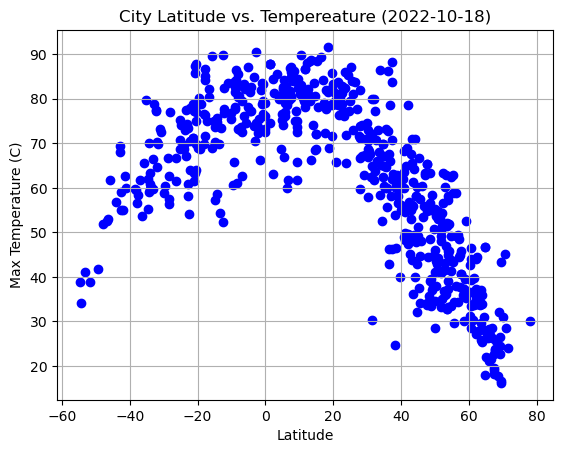

In [105]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="blue")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Tempereature (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

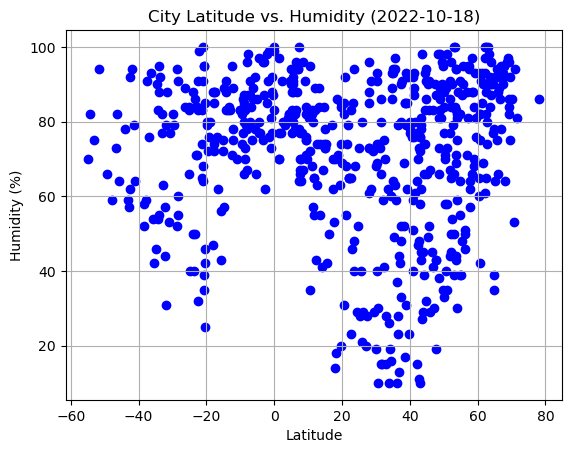

In [106]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="blue")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

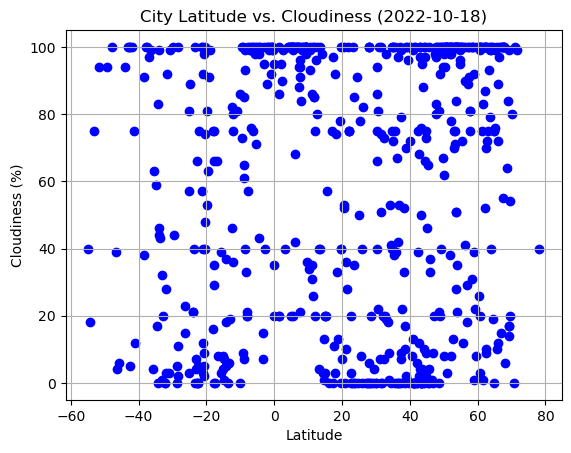

In [107]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="blue")

# Incorporate the other graph properties

plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

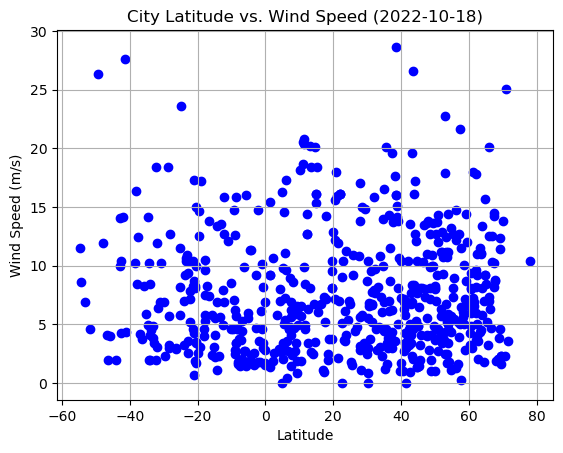

In [108]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="blue")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [109]:
# Define a function to create Linear Regression plots

def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()


In [110]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cole harbour,44.6724,-63.4751,42.96,94,75,10.36,CA,1682647862
1,albany,42.6001,-73.9662,48.45,73,12,0.96,US,1682647761
2,mana,5.6592,-53.7767,76.98,90,100,7.25,GF,1682647862
3,anadyr,64.7500,177.4833,18.10,78,0,15.66,RU,1682647862
4,arendal,58.4615,8.7725,30.00,66,31,5.06,NO,1682647862


In [111]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,nuku'alofa,-21.1333,-175.2000,77.34,100,40,17.27,TO,1682647863
12,nabire,-3.3667,135.4833,84.76,75,15,2.53,ID,1682647863
13,port-aux-francais,-49.3500,70.2167,41.72,66,94,26.33,TF,1682647863
19,malanje,-9.5402,16.3410,60.58,82,73,4.56,AO,1682647865
20,prado,-17.3411,-39.2208,75.04,88,0,8.25,BR,1682647865


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8768285779894437


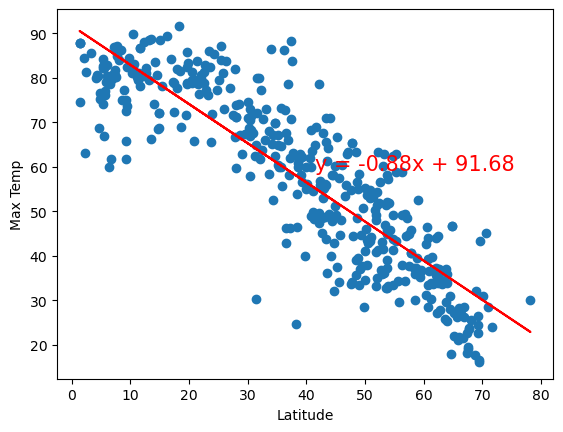

None


In [112]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel("Max Temp")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.690869011218323


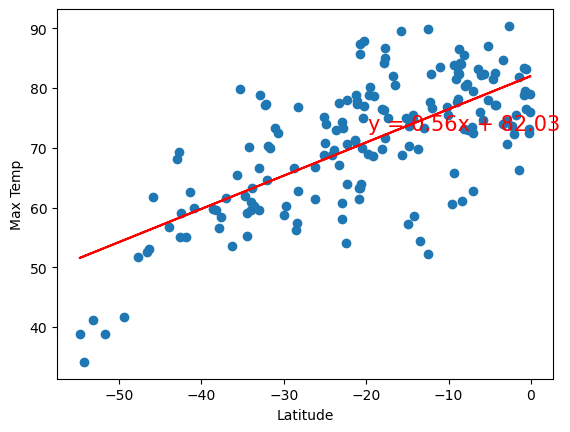

None


In [113]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel("Max Temp")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** Based on the above linear regressions, it can be determined that in the Northern Hemisphere, the higher the latitude, the less the max temperatures will be.
Alternatively, it can be determined in the Southern Hemisphere, the higher the latitude, the more the max temperatures will be. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.09541592195306704


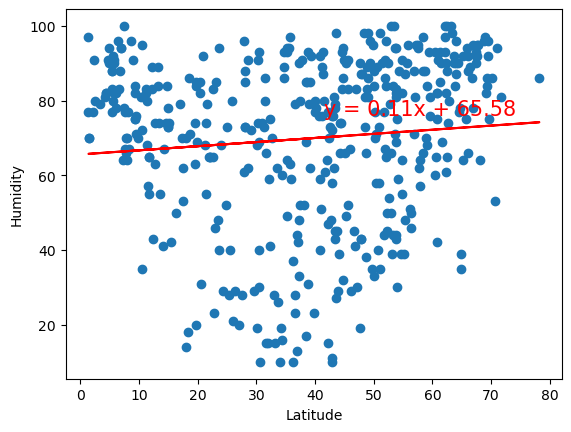

None


In [114]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel("Humidity")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.28644176370782504


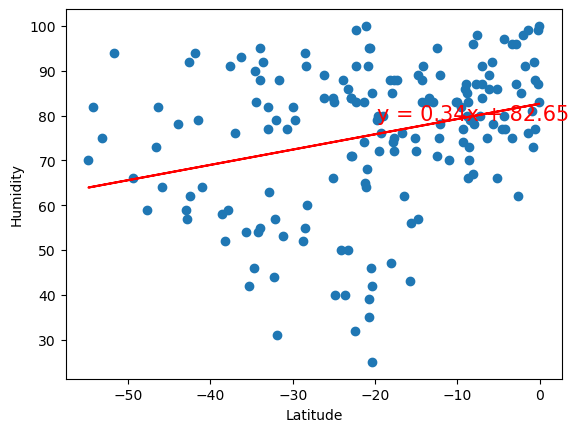

None


In [115]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.ylabel("Humidity")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** Based on the above linear regressions, it appears latitude has no significant correlation with humidity levels for both hemispheres, both humidity levels increase as latitudes increase. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.03857920487026063


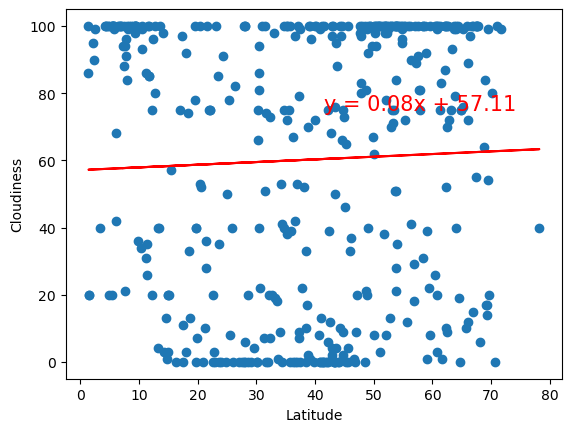

None


In [116]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.1632734706983298


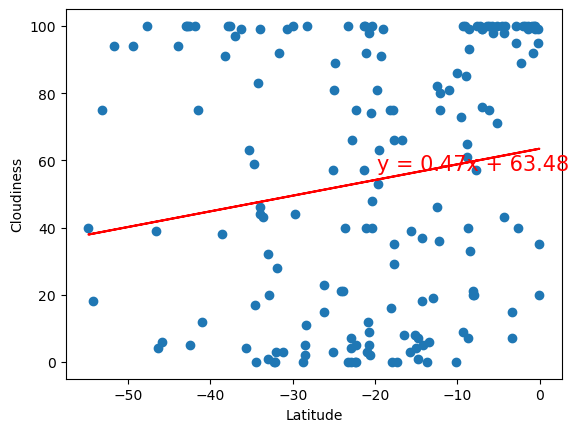

None


In [117]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** Based on the above linear regressions, it can determined that as latitude increases, percentage of cloudiness increases for both hemishpheres.
However, the increase in percentage of cloudiness is slightly more significant in the southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.010630310877991314


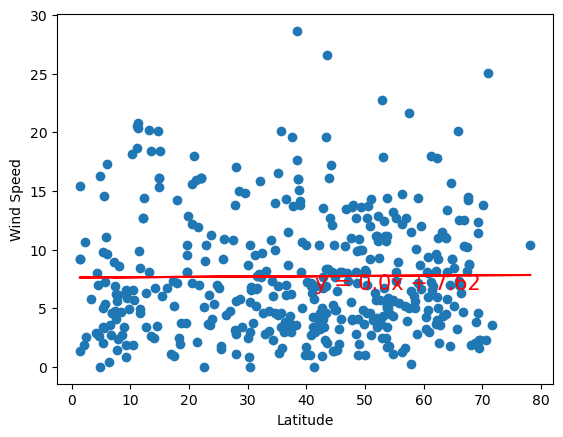

None


In [118]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.2361160116487917


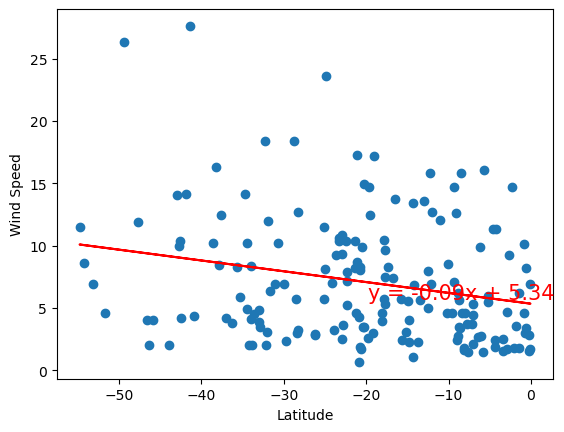

None


In [119]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** Based on the above linear regressions, it can determined that in the northern hemisphere, increasing latitude does not have much significance in regards to wind speeds, there is a slight negative regression. In the southern hemisphere, increasing latitude in regards to wind speeds has a more signifcant negative regression, as compared to the northern hemisphere. 